In [1]:
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import figure
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten, Input
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.optimizers import Adam, SGD
import pandas as pd
import numpy as np
import glob
import os
import sklearn
import math
from random import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [2]:
data = pd.read_csv(
    r'C:\Users\harik\OneDrive\Documents\Python\Graphene\data_1.csv', delimiter=",")
data = data.dropna()
data = data.drop_duplicates()
data = data.sample(frac=1, random_state=10)
data.shape


(436, 5)

In [3]:
scaler_lat = MinMaxScaler()
scaler_temp = MinMaxScaler()
scaler_crack = MinMaxScaler()
scaler_fs = MinMaxScaler()
scaler_co = MinMaxScaler()
data.CO = scaler_co.fit_transform(data[['CO']])
data.CS = scaler_crack.fit_transform(data[['CS']])
data.FS = scaler_fs.fit_transform(data[['FS']])
data.T = scaler_temp.fit_transform(data[['T']])

In [4]:
train, test = train_test_split(data, test_size=0.1, random_state = 1)
test_x = test[['T', 'CS', 'CO']]
test_y = test['FS']
train_x = train[['T', 'CS', 'CO']]
train_y = train['FS']
test_x.shape

(44, 3)

In [5]:
pa = [x[0] for x in os.walk(r'C:\Users\harik\OneDrive\Documents\Python\Graphene\ANN')]
pa

['C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN',
 'C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN\\1_layer_6',
 'C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN\\2_layer_16-6',
 'C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN\\3_layer_32-16-6',
 'C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN\\4_layer_32-32-16-8',
 'C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN\\5_layer_64-32-32-16-8',
 'C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN\\6_layer_64-64-32-32-16-8']

In [6]:
path = pa[5]
os.chdir(path)
os.getcwd()

'C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN\\5_layer_64-32-32-16-8'

In [7]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
loaded_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics = ['mse'])
loaded_model.summary()

Loaded model from disk
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 64)                256       
_________________________________________________________________
dense_151 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_152 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_153 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_154 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_155 (Dense)            (None, 1)                 9         
Total params: 4,065
Trainable params: 4,065
Non-trainable params: 0
____________________________

In [8]:
y_pred = loaded_model.predict(test_x).reshape(-1,1)
print(mean_squared_error(y_pred, test_y), r2_score(y_pred, test_y))
loaded_model.evaluate(test_x, test_y, batch_size = 2)
test_y_np = np.array(test_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in = scaler_fs.inverse_transform(y_pred)
y_test_in = scaler_fs.inverse_transform(test_y_np)
print(mean_squared_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in))
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test_in, y_pred_in)*100)

3.7793602891156644e-05 0.9969840729798899
22/22 [==============================] - 0s 2ms/step - loss: 3.7794e-05 - mse: 3.7794e-05
2.2748654655301865 0.9969840684896049
1.7124211187509022


In [10]:
y_pred_t = loaded_model.predict(train_x).reshape(-1,1)
print(mean_squared_error(y_pred_t, train_y), r2_score(y_pred_t, train_y))
loaded_model.evaluate(train_x, train_y, batch_size = 2)
test_y_np = np.array(train_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in_t = scaler_fs.inverse_transform(y_pred_t)
y_test_in_t = scaler_fs.inverse_transform(test_y_np)

#y_pred_in = scaler_lat.inverse_transform(y_pred)
#y_test_in = scaler_lat.inverse_transform(test_y_np)

print(mean_squared_error(y_pred_in_t, y_test_in_t), r2_score(y_pred_in_t, y_test_in_t))
print(mean_absolute_percentage_error(y_test_in_t, y_pred_in_t)*100)

1.6521125971574643e-05 0.9992731922718902
196/196 [==============================] - 0s 2ms/step - loss: 1.6521e-05 - mse: 1.6521e-05
0.9944369905217904 0.9992731907681036
1.3476873554240107


In [11]:
t = []
k = y_test_in.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in[i])
    m = (float)(y_test_in[i])
    k = [p, m] 
    t.append(k)
t = np.array(t)
#print(t)
df = pd.DataFrame(t, columns = ['Prediced', 'True'])
df.to_csv('Pred_True.csv')
t = []
k = y_test_in_t.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in_t[i])
    m = (float)(y_test_in_t[i])
    k = [p, m] 
    t.append(k)
t = np.array(t)
#print(t)
df = pd.DataFrame(t, columns = ['Prediced', 'True'])
df.to_csv('Pred_True_train.csv')

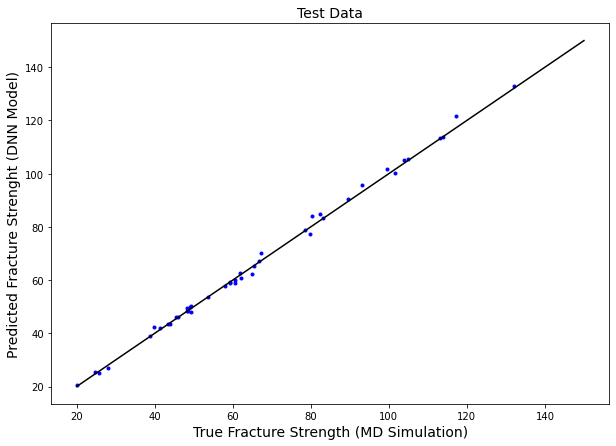

In [14]:
import matplotlib.pyplot as plt
from matplotlib import figure
fig = plt.figure(figsize=(10, 7))
plt.scatter(y_test_in, y_pred_in, marker = '.', c = "blue")

plt.xlabel('True Fracture Strength (MD Simulation)', fontsize = 14)
plt.ylabel('Predicted Fracture Strenght (DNN Model)', fontsize = 14)
plt.title('Test Data', fontsize = 14)
plt.plot([20,150], [20, 150], color = 'black')
plt.savefig('TrueVsPred.png', dpi = 100)
plt.show()

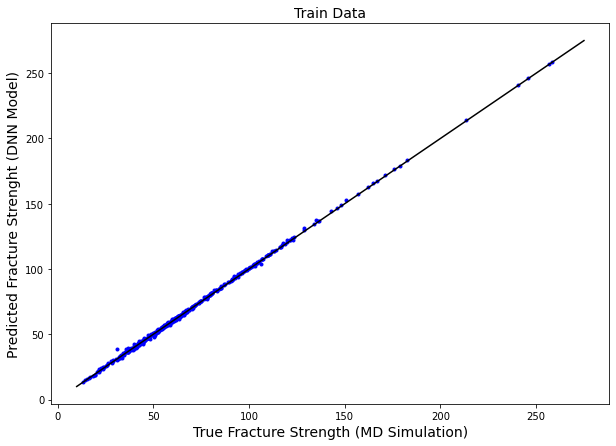

In [18]:
import matplotlib.pyplot as plt
from matplotlib import figure
fig = plt.figure(figsize=(10, 7))
plt.scatter(y_test_in_t, y_pred_in_t, marker = '.', c = "blue")
plt.xlabel('True Fracture Strength (MD Simulation)', fontsize = 14)
plt.ylabel('Predicted Fracture Strenght (DNN Model)', fontsize = 14)
plt.title('Train Data', fontsize = 14)
plt.plot([10,275], [10, 275], color = 'black')
plt.savefig('TrueVsPred_train.png', dpi = 100)
plt.show()

In [39]:
os.remove("info.txt")
file1 = open("info.txt","a")
file1.write("Learning rate = 0.001 for 200 train test split = 0.10  validation_split = 0.1 of train loss = mse batch size = 4\n")
file1.write("Learning rate = 0.0001 for 400 train test split = 0.10 validation_split = 0.1 of train loss = mse \n")
file1.write("Learning rate = 0.00001 for 400 train test split = 0.10 loss = mae \n")
print(mean_squared_error(y_pred, test_y), r2_score(y_pred, test_y),'\n', file = file1)
print(mean_squared_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in), '\n', file = file1)
print(mean_absolute_percentage_error(y_test_in, y_pred_in)*100, '\n', file = file1)
file1.close()